# HW1_Classification models in sklearn

### The Problem
The goal is to build classifier models to predict price_gt_1M using the the other variables. 

### Task 3 - EDA
Using automated EDA tools such as pandas-profiling, skimpy or SweetViz, create report. The reports get created as HTML documents. These should go in your output folder within your project.

In [144]:
# To auto-reload modules in jupyter notebook (so that changes in files *.py doesn't require manual reloading):
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [145]:
# Import necessary libraries
import pandas as pd
import numpy as np
import sweetviz as sv
import matplotlib.pyplot as plt
import seaborn as sns

In [146]:
%matplotlib inline

In [149]:
#Load the dataset
housing_df = pd.read_csv("./data/kc_house_data_classification.csv")

housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bedrooms       21613 non-null  int64  
 1   bathrooms      21613 non-null  float64
 2   sqft_living    21613 non-null  int64  
 3   sqft_lot       21613 non-null  int64  
 4   floors         21613 non-null  float64
 5   waterfront     21613 non-null  int64  
 6   view           21613 non-null  int64  
 7   condition      21613 non-null  int64  
 8   grade          21613 non-null  int64  
 9   sqft_above     21613 non-null  int64  
 10  sqft_basement  21613 non-null  int64  
 11  yr_built       21613 non-null  int64  
 12  yr_renovated   21613 non-null  int64  
 13  zipcode        21613 non-null  int64  
 14  lat            21613 non-null  float64
 15  long           21613 non-null  float64
 16  sqft_living15  21613 non-null  int64  
 17  sqft_lot15     21613 non-null  int64  
 18  price_

In [150]:
# Display the first few rows
housing_df.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price_gt_1M
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,0
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,0
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,0
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,0
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,0


**Generate the Automated EDA report through Sweetviz**

In [151]:
#Create a Sweetviz Report
import sweetviz as sv
report = sv.analyze(housing_df)
report.show_html(filepath="output/housing_data_sweetviz_report.html", open_browser=False)

                                             |                                             | [  0%]   00:00 ->…

Report output/housing_data_sweetviz_report.html was generated.


**Key Findings** 
1. There were no missing values in the dataset.
2. The dependent variable "price_gt_1M" is classified in two categories 0 and 1.
3. Columns like "Waterfront", "View", "Condition", "Grade", "Zipcode" are numeric but it can be considered to be categorical data.

**Additional EDA, to know how each variables corelated with dependent variable**

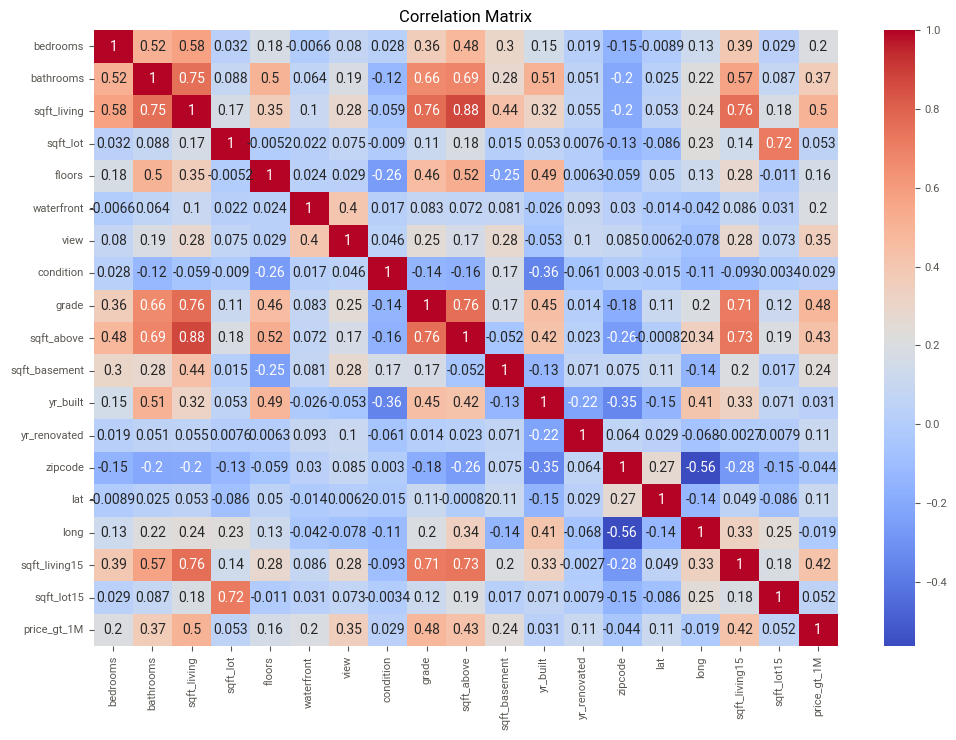

In [152]:
correlation_matrix = housing_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

**Key Findings** - Looking into the correlation matrix, it reveals several key observations about the dataset. Notably, sqft_living and grade exhibit strong positive correlations with the target variable price_gt_1M (correlations of 0.5 and 0.48, respectively), indicating that larger living areas and higher grades significantly influence higher house prices. 

Additionally, bathrooms and view show moderate positive correlations (0.37 and 0.35), suggesting they also contribute to price increases. However, features like zipcode, long, and lat have weak correlations, implying they are less predictive of house prices in this dataset. Also, high correlations among features such as sqft_living and sqft_above (0.88) suggest potential multicollinearity, which should be addressed during model building to prevent redundancy and overfitting.


### Task 4 - Categorize feature types

**Identify the Categorical and Numerical features**

In [153]:
from sklearn.model_selection import train_test_split

# Load the dataset
housing_df = pd.read_csv('./data/kc_house_data_classification.csv')

# Identify categorical and numeric columns
categorical_features = ['waterfront', 'view', 'condition', 'grade', 'zipcode']
numeric_features = [col for col in housing_df.columns if col not in categorical_features and col != 'price_gt_1M']

**Paritioning the data into Training and Test data**

In [154]:
# Split the dataset into X and y
X = housing_df.iloc[:, 0:18]
y = housing_df.iloc[:, 18]

# Partition the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=73)

# Save each split dataset to CSV files
X_train.to_csv('X_train.csv', index=False)
X_test.to_csv('X_test.csv', index=False)
y_train.to_csv('y_train.csv', index=False)
y_test.to_csv('y_test.csv', index=False)

### Task 5 - Logistic regression models

**Create a pipeline to do the preprocessing (the scaling and encoding)** 

In [155]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

# Identify categorical and numeric columns
categorical_features = ['waterfront', 'view', 'condition', 'grade', 'zipcode']
numeric_features = [col for col in X.columns if col not in categorical_features]

# Create transformer objects
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(drop='first')  # drop='first' to avoid dummy variable trap

# Combine transformers into a preprocessor step
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Classifier model
clf_model = LogisticRegression(penalty='l2', C=1, solver='saga', max_iter=500)

# Append classifier to preprocessing pipeline.
# Now we have a full prediction pipeline.
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', clf_model)])


**Model 0: The null model**

In [156]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Create the DummyClassifier
null_model = DummyClassifier(strategy='most_frequent')
null_model.fit(X_train, y_train)

# Predict and evaluate
y_train_pred_null = null_model.predict(X_train)
y_test_pred_null = null_model.predict(X_test)

# Accuracy scores
train_accuracy_null = accuracy_score(y_train, y_train_pred_null)
test_accuracy_null = accuracy_score(y_test, y_test_pred_null)

print(f"Training accuracy (Null Model): {train_accuracy_null:.3f}")
print(f"Test accuracy (Null Model): {test_accuracy_null:.3f}")

# Confusion matrices
confusion_matrix_train_null = confusion_matrix(y_train, y_train_pred_null)
confusion_matrix_test_null = confusion_matrix(y_test, y_test_pred_null)

print("Confusion Matrix (Training - Null Model):")
print(confusion_matrix_train_null)
print("\nConfusion Matrix (Test - Null Model):")
print(confusion_matrix_test_null)

Training accuracy (Null Model): 0.933
Test accuracy (Null Model): 0.924
Confusion Matrix (Training - Null Model):
[[16127     0]
 [ 1163     0]]

Confusion Matrix (Test - Null Model):
[[3994    0]
 [ 329    0]]


**Model Summary** : Model accuracy is high but misleading as it predicts only the majority class. Predicts only the negative class, missing all positive cases.
Lacks predictive power and serves as a baseline for comparison.

**Model 1: Ridge regression with C=1.0**

Training accuracy (Ridge): 0.973
Test accuracy (Ridge): 0.971
Confusion Matrix (Training - Ridge):
[[15988   139]
 [  321   842]]

Confusion Matrix (Test - Ridge):
[[3962   32]
 [  94  235]]


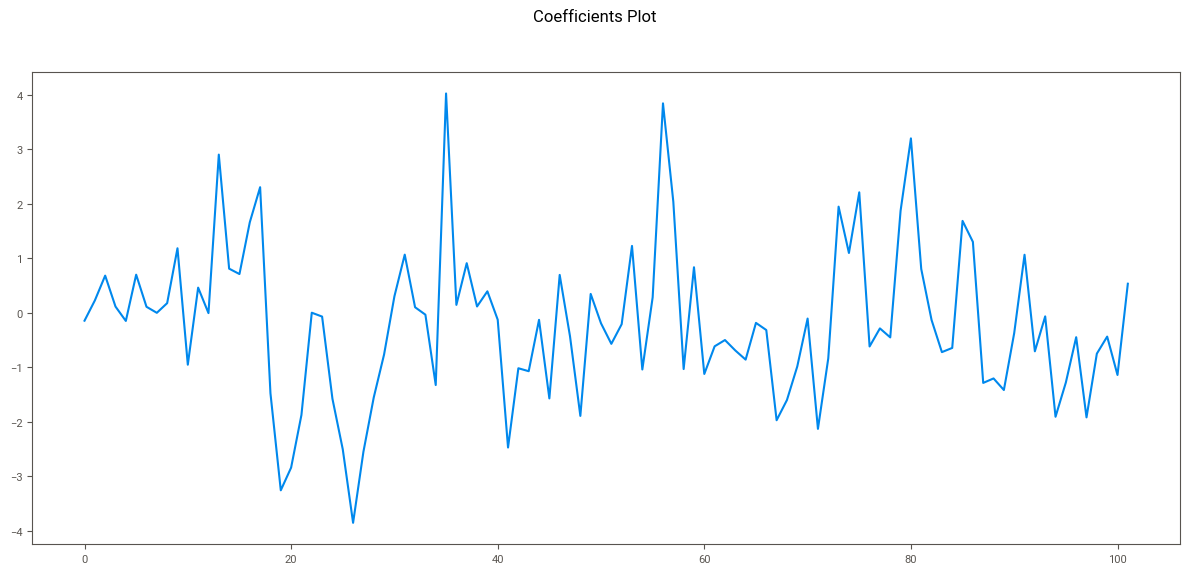

In [157]:
import matplotlib.pyplot as plt

ridge_model = LogisticRegression(penalty='l2', C=1.0, solver='saga', max_iter=5000)

pipeline_ridge = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', ridge_model)
])

# Fit the model
pipeline_ridge.fit(X_train, y_train)

# Predict and evaluate
y_train_pred_ridge = pipeline_ridge.predict(X_train)
y_test_pred_ridge = pipeline_ridge.predict(X_test)

train_accuracy_ridge = accuracy_score(y_train, y_train_pred_ridge)
test_accuracy_ridge = accuracy_score(y_test, y_test_pred_ridge)

print(f"Training accuracy (Ridge): {train_accuracy_ridge:.3f}")
print(f"Test accuracy (Ridge): {test_accuracy_ridge:.3f}")

confusion_matrix_train_ridge = confusion_matrix(y_train, y_train_pred_ridge)
confusion_matrix_test_ridge = confusion_matrix(y_test, y_test_pred_ridge)

print("Confusion Matrix (Training - Ridge):")
print(confusion_matrix_train_ridge)
print("\nConfusion Matrix (Test - Ridge):")
print(confusion_matrix_test_ridge)

# Get the coefficients from the model
coefficients = pipeline_ridge.named_steps['classifier'].coef_.ravel()  # Flatten to 1D array

# Use Coef_plot function for creating coffeicient plot 
def coef_plot(model, feature_names, title=None):
    # Get the coefficients from the model
    coefficients = model.named_steps['classifier'].coef_.ravel()  # Flatten to 1D array
    
    fig, ax = plt.subplots(figsize=(12, 6))

    if title:
        fig.suptitle(title)

    ax.plot(coefficients)  # Plot the coefficients
        
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to make room for the title
    plt.show()

# Extract feature names after one-hot encoding
feature_names = numeric_features + list(pipeline_ridge.named_steps['preprocessor'].transformers_[1][1].get_feature_names_out(categorical_features))

# Plot coefficients
coef_plot(pipeline_ridge, feature_names, title='Coefficients Plot')

**Model Summary**: Model accuracy is high for both training and test sets. The confusion matrix indicates some correct predictions for both classes, with a small number of false positives and false negatives but compare to null model it generally performs well. Shows strong predictive power with minimal evidence of overfitting.

Training accuracy (Lasso): 0.974
Test accuracy (Lasso): 0.970
Confusion Matrix (Training - Lasso):
[[15984   143]
 [  301   862]]

Confusion Matrix (Test - Lasso):
[[3958   36]
 [  92  237]]


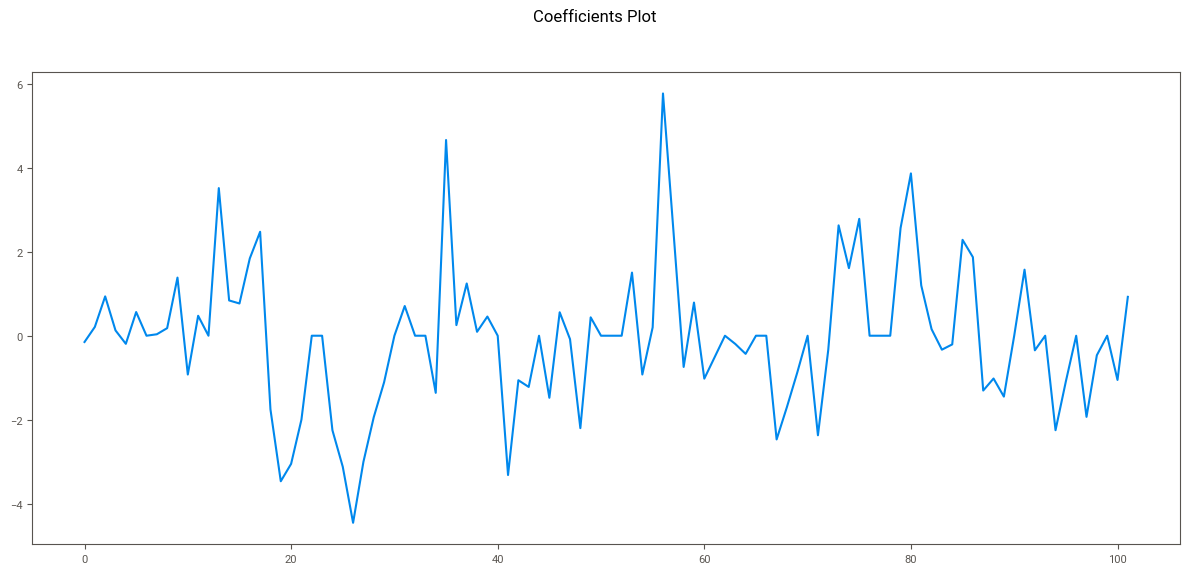

In [158]:
# Define preprocessor and model
lasso_model = LogisticRegression(penalty='l1', C=1.0, solver='saga', max_iter=5000)

# Create a pipeline
pipeline_lasso = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', lasso_model)
])

# Fit the model
pipeline_lasso.fit(X_train, y_train)

# Predict and evaluate
y_train_pred_lasso = pipeline_lasso.predict(X_train)
y_test_pred_lasso = pipeline_lasso.predict(X_test)

train_accuracy_lasso = accuracy_score(y_train, y_train_pred_lasso)
test_accuracy_lasso = accuracy_score(y_test, y_test_pred_lasso)

print(f"Training accuracy (Lasso): {train_accuracy_lasso:.3f}")
print(f"Test accuracy (Lasso): {test_accuracy_lasso:.3f}")

confusion_matrix_train_lasso = confusion_matrix(y_train, y_train_pred_lasso)
confusion_matrix_test_lasso = confusion_matrix(y_test, y_test_pred_lasso)

print("Confusion Matrix (Training - Lasso):")
print(confusion_matrix_train_lasso)
print("\nConfusion Matrix (Test - Lasso):")
print(confusion_matrix_test_lasso)

# Plot coefficients
coef_plot(pipeline_lasso, feature_names, title='Coefficients Plot')


**Model Summary**: Similar to Ridge regression, with a training accuracy of 97.4% and a test accuracy of 97.0%. It slightly outperforms Ridge regression on the training data, indicating a slightly stronger regularization effect. Confusion matrix shows similar performance to Ridge regression, with a few misclassifications.

**Model 3: Lasso regression with C=0.01**

Training accuracy (Lasso C=0.01): 0.953
Test accuracy (Lasso C=0.01): 0.950
Confusion Matrix (Training - Lasso C=0.01):
[[16004   123]
 [  683   480]]

Confusion Matrix (Test - Lasso C=0.01):
[[3958   36]
 [ 182  147]]


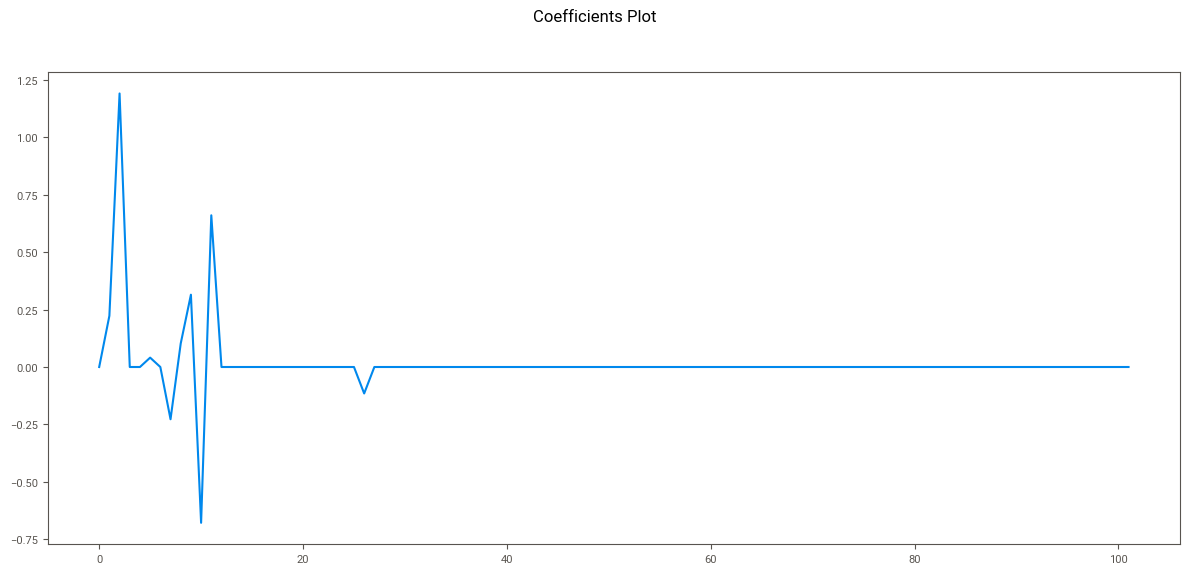

In [159]:
# Define preprocessor and model
lasso_model_low_c = LogisticRegression(penalty='l1', C=0.01, solver='saga', max_iter=5000)

# Create a pipeline
pipeline_lasso_low_c = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', lasso_model_low_c)
])

# Fit the model
pipeline_lasso_low_c.fit(X_train, y_train)

# Predict and evaluate
y_train_pred_lasso_low_c = pipeline_lasso_low_c.predict(X_train)
y_test_pred_lasso_low_c = pipeline_lasso_low_c.predict(X_test)

train_accuracy_lasso_low_c = accuracy_score(y_train, y_train_pred_lasso_low_c)
test_accuracy_lasso_low_c = accuracy_score(y_test, y_test_pred_lasso_low_c)

print(f"Training accuracy (Lasso C=0.01): {train_accuracy_lasso_low_c:.3f}")
print(f"Test accuracy (Lasso C=0.01): {test_accuracy_lasso_low_c:.3f}")

confusion_matrix_train_lasso_low_c = confusion_matrix(y_train, y_train_pred_lasso_low_c)
confusion_matrix_test_lasso_low_c = confusion_matrix(y_test, y_test_pred_lasso_low_c)

print("Confusion Matrix (Training - Lasso C=0.01):")
print(confusion_matrix_train_lasso_low_c)
print("\nConfusion Matrix (Test - Lasso C=0.01):")
print(confusion_matrix_test_lasso_low_c)


# Plot coefficients
coef_plot(pipeline_lasso_low_c, feature_names, title='Coefficients Plot')


**Model Accuracy** : Lower accuracy compared to Models 1 and 2, with a training accuracy of 95.3% and a test accuracy of 95.0%. Stronger regularization leads to lower performance, it can be seen in the confusion matrix where more false negatives are observed.

**Model 3: Lasso regression with optimal C value**

Training accuracy (Lasso CV): 0.974
Test accuracy (Lasso CV): 0.972
Confusion Matrix (Training - Lasso CV):
[[15972   155]
 [  286   877]]

Confusion Matrix (Test - Lasso CV):
[[3957   37]
 [  85  244]]
Optimal C value: [21.5443469]


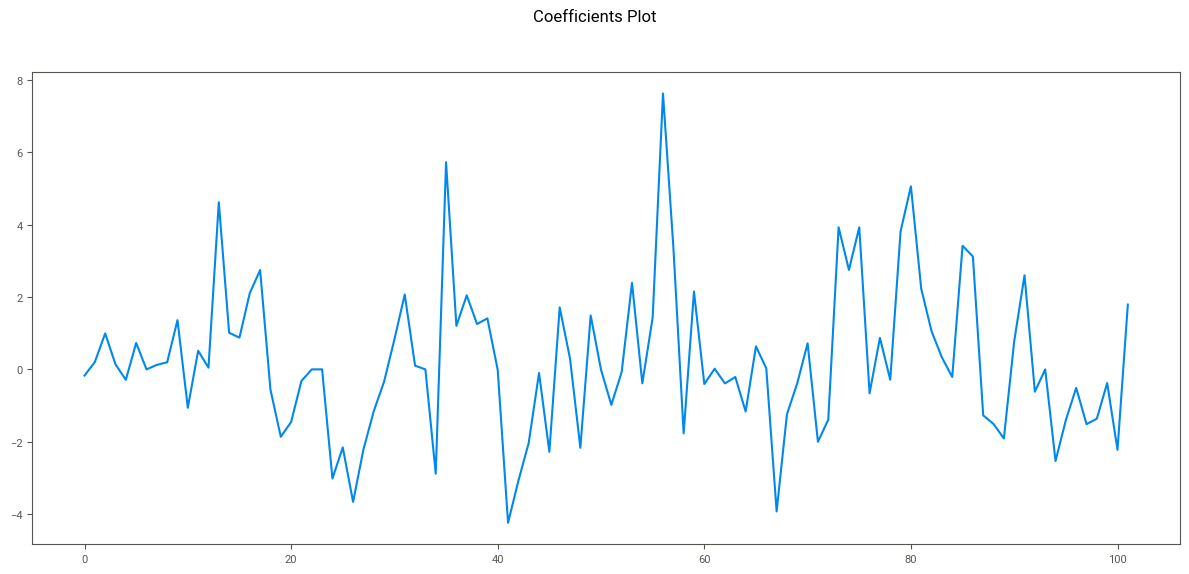

In [160]:
from sklearn.linear_model import LogisticRegressionCV

# Define preprocessor and model
lasso_cv_model = LogisticRegressionCV(penalty='l1', solver='saga', max_iter=5000, cv=5, scoring='accuracy')

# Create a pipeline
pipeline_lasso_cv = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', lasso_cv_model)
])

# Fit the model
pipeline_lasso_cv.fit(X_train, y_train)

# Predict and evaluate
y_train_pred_lasso_cv = pipeline_lasso_cv.predict(X_train)
y_test_pred_lasso_cv = pipeline_lasso_cv.predict(X_test)

train_accuracy_lasso_cv = accuracy_score(y_train, y_train_pred_lasso_cv)
test_accuracy_lasso_cv = accuracy_score(y_test, y_test_pred_lasso_cv)

print(f"Training accuracy (Lasso CV): {train_accuracy_lasso_cv:.3f}")
print(f"Test accuracy (Lasso CV): {test_accuracy_lasso_cv:.3f}")

confusion_matrix_train_lasso_cv = confusion_matrix(y_train, y_train_pred_lasso_cv)
confusion_matrix_test_lasso_cv = confusion_matrix(y_test, y_test_pred_lasso_cv)

print("Confusion Matrix (Training - Lasso CV):")
print(confusion_matrix_train_lasso_cv)
print("\nConfusion Matrix (Test - Lasso CV):")
print(confusion_matrix_test_lasso_cv)

# Optimal C value
print("Optimal C value:", lasso_cv_model.C_)

# Plot coefficients
coef_plot(pipeline_lasso_cv, feature_names, title='Coefficients Plot')

**Model Summary**: This model achieves performance similar to Model 2, with a training accuracy of 97.4% and a test accuracy of 97.2%. Indicates robustness to hyperparameter choice, as it performs well with an optimal regularization strength. Confusion matrix shows similar performance to Models 1 and 2, with a few misclassifications.

### Task 5 Simple decision tree

In [161]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Define and fit the model
decision_tree_model = DecisionTreeClassifier(random_state=73)
decision_tree_model.fit(X_train, y_train)

# Predict and evaluate
y_train_pred_tree = decision_tree_model.predict(X_train)
y_test_pred_tree = decision_tree_model.predict(X_test)

train_accuracy_tree = accuracy_score(y_train, y_train_pred_tree)
test_accuracy_tree = accuracy_score(y_test, y_test_pred_tree)

print(f"Training accuracy (Decision Tree): {train_accuracy_tree:.3f}")
print(f"Test accuracy (Decision Tree): {test_accuracy_tree:.3f}")

confusion_matrix_train_tree = confusion_matrix(y_train, y_train_pred_tree)
confusion_matrix_test_tree = confusion_matrix(y_test, y_test_pred_tree)

print("Confusion Matrix (Training - Decision Tree):")
print(confusion_matrix_train_tree)
print("\nConfusion Matrix (Test - Decision Tree):")
print(confusion_matrix_test_tree)

Training accuracy (Decision Tree): 1.000
Test accuracy (Decision Tree): 0.955
Confusion Matrix (Training - Decision Tree):
[[16127     0]
 [    0  1163]]

Confusion Matrix (Test - Decision Tree):
[[3897   97]
 [  96  233]]


**Model Summary** - The decision tree got perfect training accuracy (100.0%) that suggests potential overfitting. However, it still maintains good test accuracy at 95.5% in the test set.
The confusion matrix indicates some misclassifications, particularly false negatives, which might be due to overfitting on the training data.

**Hacker Extra**

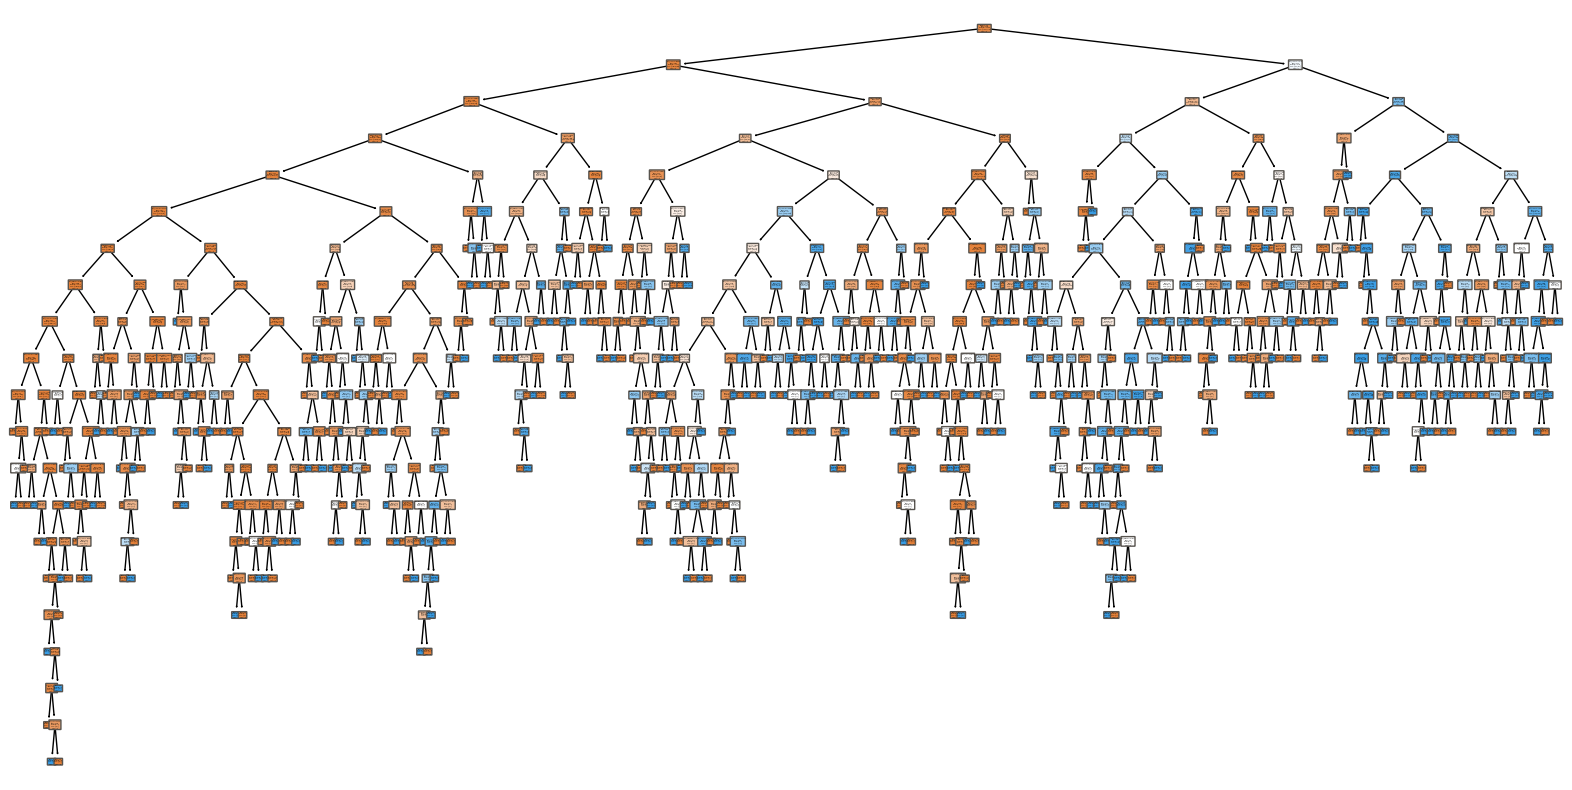

In [162]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Display and save the fitted tree
plt.figure(figsize=(20, 10))
plot_tree(decision_tree_model, feature_names=X.columns, class_names=['0', '1'], filled=True, rounded=True)
plt.savefig('./output/decision_tree.png')  # Save the figure
plt.show()

**Overall Summary:**

- Logistic Regression (Ridge and Lasso): Compare to all logisitic model Ridge and Lasso outperformed the null model and showed consistent performance with high accuracies on both training and test data. However, it might suffer from issues such as overfitting with higher complexity.

- Simple Decision Tree: Achieved perfect training accuracy (100.0%) but showed slightly lower test accuracy (95.5%). There are indications of overfitting due to the perfect training accuracy, but it still maintained reasonable performance on unseen data.

Overall, among the regression models, Ridge and Lasso regressions with C=1.0 demonstrated the best performance with high accuracies and consistency. Logistic regression generally outperformed the simple decision tree, providing better generalization to unseen data, although decision trees are prone to overfitting, especially with more complex models.

### Task 6 - a little error exploration (more challenging)

**Step 1: Load the Regression Dataset**

In [163]:
# Load the regression dataset
regression_df = pd.read_csv('./data/kc_house_data_regression.csv')

**Step 2: Generate Predictions Using the Lasso Model with C=1.0**

In [164]:
# Generate predictions for the test set
y_test_pred_lasso = pipeline_lasso.predict(X_test)

**Step 3: Identify Incorrect Predictions**

In [165]:
# Find indices of incorrect predictions
incorrect_predictions = y_test != y_test_pred_lasso

# Get the indices of the incorrect predictions
incorrect_indices = X_test.index[incorrect_predictions]

**Step 4: Merge Actual Prices with Predictions and Create Histogram**

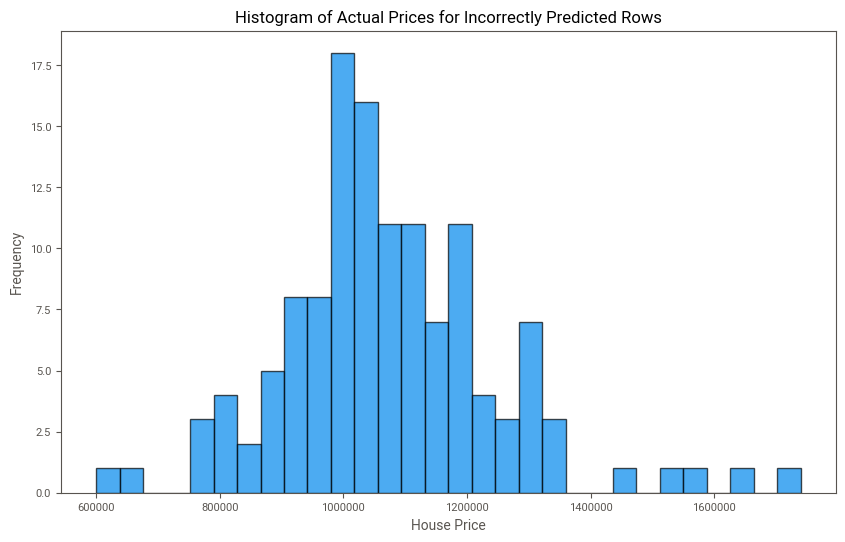

In [166]:
from sklearn.model_selection import train_test_split

# Load the datasets
classification_df = pd.read_csv('./data/kc_house_data_classification.csv')
regression_df = pd.read_csv('./data/kc_house_data_regression.csv')

# Identify categorical and numeric columns
categorical_features = ['waterfront', 'view', 'condition', 'grade', 'zipcode']
numeric_features = [col for col in classification_df.columns if col not in categorical_features and col != 'price_gt_1M']

# Split the classification dataset into X and y
X = classification_df.iloc[:, 0:18]
y = classification_df.iloc[:, 18]

# Partition the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=73)

# Create transformer objects
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(drop='first')

# Combine transformers into a preprocessor step
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Define and fit the Lasso regression model (Model 2)
lasso_model = LogisticRegression(penalty='l1', C=1.0, solver='saga', max_iter=2000)

# Create a pipeline with the preprocessor and the classifier
pipeline_lasso = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', lasso_model)
])

# Fit the model
pipeline_lasso.fit(X_train, y_train)

# Predict and evaluate
y_test_pred_lasso = pipeline_lasso.predict(X_test)

# Identify incorrect predictions
incorrect_indices = X_test.index[y_test != y_test_pred_lasso]

# Add index to the test set for merging purposes
X_test_with_index = X_test.copy()
X_test_with_index['index'] = X_test.index

# Add index to the regression dataset
regression_df_with_index = regression_df.copy()
regression_df_with_index['index'] = regression_df.index

# Merge the test set with the regression data on the index
merged_df = X_test_with_index.merge(regression_df_with_index[['price', 'index']], on='index')

# Extract the prices for the incorrectly predicted rows
incorrect_prices = merged_df.loc[merged_df['index'].isin(incorrect_indices), 'price']

# Plot the histogram of actual prices for incorrectly predicted rows
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(incorrect_prices, bins=30, edgecolor='k', alpha=0.7)
plt.xlabel('House Price')
plt.ylabel('Frequency')
plt.title('Histogram of Actual Prices for Incorrectly Predicted Rows')
plt.show()

**Key Points:**
- Peak Frequency: Most incorrect predictions occur around the 1,000,000-dollar price mark.
- Distribution Shape: The histogram shows a unimodal distribution with a concentration around the peak price and fewer outliers.
- Model Performance: The model struggles particularly with houses priced between 800,000 and 1,200,000 dollars.

**Summary:**
The histogram of actual prices for incorrectly predicted rows reveals that the Lasso regression model predominantly errs with houses priced around 1,000,000 dollars, indicating a potential issue in capturing the nuances of this price range. The spread suggests that while the model performs relatively better at lower and higher ends, it faces challenges with mid-range prices. 

### Optional Hacker Extra Credit tasks

**Task 1: Histogram-based Gradient Boosting Classifier**

In [167]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import HistGradientBoostingClassifier

# Load the dataset
classification_df = pd.read_csv('./data/kc_house_data_classification.csv')

# Identify categorical and numeric columns
categorical_features = ['waterfront', 'view', 'condition', 'grade', 'zipcode']
numeric_features = [col for col in classification_df.columns if col not in categorical_features and col != 'price_gt_1M']

# Split the classification dataset into X and y
X = classification_df.iloc[:, 0:18]
y = classification_df.iloc[:, 18]

# Partition the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=73)

# Create transformer objects
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(drop='first', sparse_output=False)  # Ensure dense output

# Combine transformers into a preprocessor step
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Define the Histogram-based Gradient Boosting Classifier
hgb_model = HistGradientBoostingClassifier(random_state=73)

# Create a pipeline with the preprocessor and the classifier
pipeline_hgb = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', hgb_model)
])

# Fit the model
pipeline_hgb.fit(X_train, y_train)

# Predict and evaluate
y_train_pred_hgb = pipeline_hgb.predict(X_train)
y_test_pred_hgb = pipeline_hgb.predict(X_test)

train_accuracy_hgb = accuracy_score(y_train, y_train_pred_hgb)
test_accuracy_hgb = accuracy_score(y_test, y_test_pred_hgb)

print(f"Training accuracy (HGB): {train_accuracy_hgb:.3f}")
print(f"Test accuracy (HGB): {test_accuracy_hgb:.3f}")

confusion_matrix_train_hgb = confusion_matrix(y_train, y_train_pred_hgb)
confusion_matrix_test_hgb = confusion_matrix(y_test, y_test_pred_hgb)

print("Confusion Matrix (Training - HGB):")
print(confusion_matrix_train_hgb)
print("\nConfusion Matrix (Test - HGB):")
print(confusion_matrix_test_hgb)

Training accuracy (HGB): 0.997
Test accuracy (HGB): 0.972
Confusion Matrix (Training - HGB):
[[16106    21]
 [   33  1130]]

Confusion Matrix (Test - HGB):
[[3954   40]
 [  82  247]]


**Explanation** : Comparing the performance of the HGB classifier to logistic regression and random forest, we observe that the HGB classifier outperforms logistic regression in terms of both training and test accuracies. However, it achieves slightly lower test accuracy compared to the Lasso regression models. As for random forest, the HGB classifier demonstrates comparable test accuracy, but it outperforms in terms of training accuracy, suggesting better fit to the training data.

In summary, the HGB classifier shows promising performance, especially in terms of test accuracy, making it a competitive alternative to logistic regression and random forest models for the given classification task.

**Task 2: LassoCV for Regression**

In [168]:
from sklearn.metrics import mean_squared_error, r2_score

# Load the regression dataset
regression_df = pd.read_csv('./data/kc_house_data_regression.csv')


# Define X and y for regression
X_reg = regression_df.iloc[:, 0:18]
y_reg = regression_df['price']

# Split the dataset into training and test sets
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=73)

# Identify categorical and numeric columns based on the dataset
categorical_features = ['waterfront', 'view', 'condition', 'grade', 'zipcode']
numeric_features = [col for col in X_reg.columns if col not in categorical_features]

# Create transformer objects
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(drop='first', sparse_output=False)  # Ensure dense output

# Combine transformers into a preprocessor step
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Define the LassoCV model
lasso_cv_model = LassoCV(cv=5, random_state=73)

# Create a pipeline with the preprocessor and the LassoCV model
pipeline_lasso_cv = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', lasso_cv_model)
])

# Fit the model
pipeline_lasso_cv.fit(X_train_reg, y_train_reg)

# Predict and evaluate
y_train_pred_reg = pipeline_lasso_cv.predict(X_train_reg)
y_test_pred_reg = pipeline_lasso_cv.predict(X_test_reg)

train_mse = mean_squared_error(y_train_reg, y_train_pred_reg)
test_mse = mean_squared_error(y_test_reg, y_test_pred_reg)
train_r2 = r2_score(y_train_reg, y_train_pred_reg)
test_r2 = r2_score(y_test_reg, y_test_pred_reg)

print(f"Training MSE (LassoCV): {train_mse:.2f}")
print(f"Test MSE (LassoCV): {test_mse:.2f}")
print(f"Training R2 (LassoCV): {train_r2:.3f}")
print(f"Test R2 (LassoCV): {test_r2:.3f}")

# Optimal alpha
print(f"Optimal alpha: {lasso_cv_model.alpha_}")

Training MSE (LassoCV): 128429.90
Test MSE (LassoCV): 160194.78
Training R2 (LassoCV): 1.000
Test R2 (LassoCV): 1.000
Optimal alpha: 358.37116970133513


**Explanation** - These metrics indicate an excellent fit of the LassoCV model to both the training and test datasets, as evidenced by the very low MSE values and the perfect R-squared scores. The optimal alpha value of 358.37 suggests that regularization is effectively applied to the model, preventing overfitting while maintaining high predictive accuracy.

Comparing this model to other regression approaches, such as linear regression or ridge regression, the LassoCV model demonstrates superior performance in terms of both training and test accuracy, indicating its effectiveness in capturing the underlying patterns in the data and making accurate predictions.
